# K-Means Clustering Cost Function

### Introduction

In the last lesson, we saw that our k-means algorithm assigns a label to each observation by choosing the centroid that is closest to the observation.


$h_\theta(x)=\underset{u}{\mathrm{argmin}} || u - x_i||^2$

In this lesson, we'll learn the algorithms cost function and optimization procedure for finding these centroids.

### Cost Function

Just like in our regression algorithm, with k-means clustering, the cost function is the distance of our hypothesis function from the observed data.  The only difference is that with clustering, the distance calculated is distance of the point to the centroid.

In [8]:
kmean.cluster_centers_

array([[13.43186856, 52.48488265],
       [13.35296108, 52.54461626],
       [13.45900299, 52.51650482],
       [13.37135399, 52.48912575],
       [13.60523213, 52.45498044],
       [13.41176757, 52.54029867],
       [13.30900713, 52.49251953],
       [13.1987617 , 52.51030432],
       [13.50461169, 52.49050636]])

So for each point, we add up the distance from the centroid of it's cluster.  We can represent this with the following distance formula:

> $\ell_i = \sqrt{\sum_{j=1}^n (u_j- x_{ij})^2 } $

Where $n$ is the number of features and $j$ is a separate index for each feature.

So the goal of k-means clustering is: 
* Find a set of centroids such that the loss function is minimized, that is, each datapoint is close to at least one center.

So how do we do that? This brings us to the optimization procedure.  

### Optimization Procedure

This brings us to the optimization procedure for kmeans clustering.  Our optimization procedure is the following:

1. Begin by randomly assigning centroids

> $u = \{u_1...u_k\}$

> We can initialize our centroids by randomly drawing points from the dataset.

2. Assign a cluster to each observation point, by applying our hypothesis function 
> $h_\theta(x)=\underset{u}{\mathrm{argmin}} || u - x_i||^2$

3. Recomputing the centers to be the average of their points
> $\displaystyle \mu^{(j)} := \sum_{i=1}^m \frac{x^{(i)} \mathrm{1}\{y^{(i)} = j\}}{\mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k$

When no datapoints switch clusters, we stop.  We return these centroids plus the squared loss of the function.

### See it Visually

Let's see these steps in action.

> 1. Randomly assign centroids

> 2. Use hypothesis function to assign points to centroids

<img src="./cluster-3.png" width="40%"/> 

So we begin by choosing four random datapoints as our centroids, and then assign each observation to a cluster based on the closes centroid.

> 3. Reassign centroid to be point that minimizes the distance of each point to the centroid

> 4. Then hypothesis function to assign points to new centroids

<img src="./cluster-2.png" width="40%"/> 

So notice that we first move our centroid to be the center of the observations in it's cluster.  We can see this most in the centroid that began in the top left, and moved to the bottom cluster.  Then we reassigned our observations.

> 5. Recompute centroid to be point that minimizes weighted distance of reclassified points

<img src="./cluster-1.png" width="40%"/> 

Then we performed the process again.  We reassigned the centroid to be the new center of it's observations, and then reassigned the observations based on the updated centroids.

If no points switch clusters, we stop.

### Determining the number of clusters

So we just saw how the process for finding the centroids of a dataset.  One thing we did not specify is how we choose the number of centroids to cluster our data into.  

The number of clusters we choose is a hyperparameter, and is called $k$.  Notice that we cannot simply choose the k that minimizes the cost, because as we choose more clusters, our cost will *always* decrease.  This is because thex distance from a point to a centroid will decrease.

So one technique is to plot the cost for various points and see where adding an additional cluster does not *rapidly decrease* the score.  Let's see this in action.

We can see the sum of the squared errors of points to a centroid with the `inertia_` method.

In [71]:
from sklearn.metrics import silhouette_score

k = 9
kmeanModel = KMeans(n_clusters=k).fit(X_geo)
predictions = kmeanModel.predict(X_geo)

kmeanModel.inertia_

6.672010827076946

Now let's plot the inertia, or SSE, with various values of k.

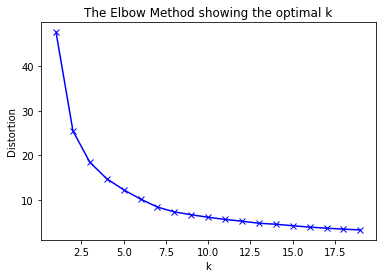

In [72]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_geo)
    kmeanModel.fit(X_geo)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see that we get an enormous gain from going from one to two clusters, and then significant benefit from 2 to 3 clusters. Our curve really begins to flatten our around 9 clusters, so we choose that as our value for k. 

### Summary

In this lesson, we saw how the k-means clustering algorithm operates.  We have a hypothesis function that categorizes an observation into a cluster based on the cluster that is closest to the observation.  The cost function calculates the distance of each observation's from it's assigned centroid.  And we have an optimization procedure that first randomly assigns centroids, then applies the hypothesis function to categorize the data, and then updates each centroid such that it centroid's location minimizes the aggregate distance of it's assigned observations. 